In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error

**Autoencoders: In this task, consider the MNIST dataset for training autoencoder models (with a suitable regularization) with hidden (latent) dimension of 32, and 64.**
 
**(a) Report the train and test reconstruction errors for the three models (display about 10 recon- structions from the train and test data each).**

In [29]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [30]:
# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [31]:

# Define autoencoder architecture
def autoencoder_custom(dim_hidden):
    # Input layer for the image data
    img_input = Input(shape=(784,))
    encoded = Dense(dim_hidden, activation='relu', activity_regularizer=regularizers.l1(1e-4))(img_input)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder_model = Model(img_input, decoded)
    encoder = Model(img_input, encoded)
    input_decoder = Input(shape=(dim_hidden,))
    layer_decoder = autoencoder_model.layers[-1]
    
    # Create the decoder model (reconstructs from latent representation)
    decoder = Model(input_decoder, layer_decoder(input_decoder))
    return autoencoder_model, encoder, decoder

In [32]:
# Build and train autoencoder models
dim_hidden = 32

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6843 - val_loss: 0.6155
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5987 - val_loss: 0.5535
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5398 - val_loss: 0.5038
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4927 - val_loss: 0.4638
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4549 - val_loss: 0.4314
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4239 - val_loss: 0.4050
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3988 - val_loss: 0.3834
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3784 - val_loss: 0.3656
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3615 - val_loss: 0.3508
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3475 - val_loss: 0.3385
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


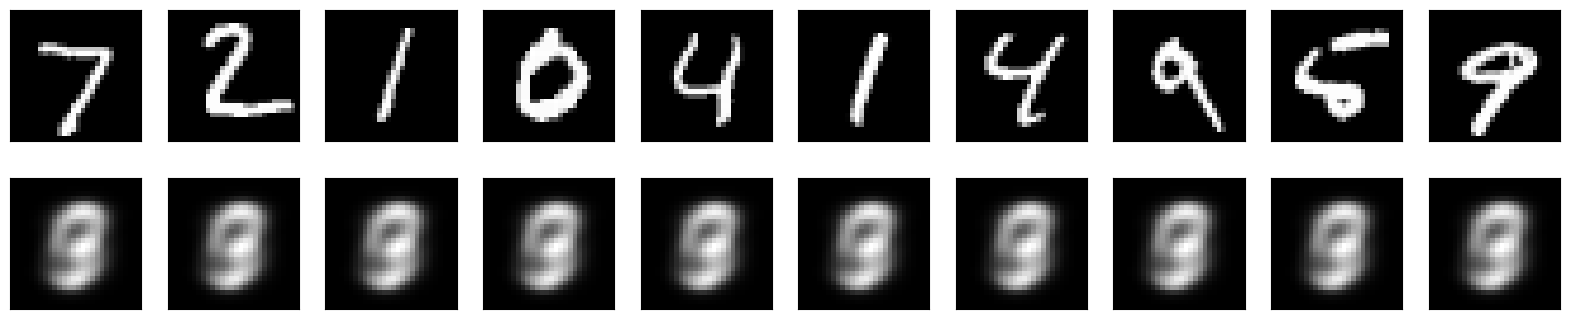

	***************
	Hidden Dimension 32:
	 Train Error = 0.07807199656963348,
	 Test Error = 0.07837070524692535


In [33]:
autoencoder_model, encoder, decoder = autoencoder_custom(dim_hidden)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Compute reconstruction errors
train_reconstruction = autoencoder_model.predict(x_train)
test_reconstruction = autoencoder_model.predict(x_test)
trainError = mean_squared_error(x_train, train_reconstruction)
testError = mean_squared_error(x_test, test_reconstruction)
reconstruction_errors = (trainError, testError)

# Display sample reconstructions
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Display reconstruction errors
print("\t***************")
print(f"\tHidden Dimension {dim_hidden}:\n\t Train Error = {trainError},\n\t Test Error = {testError}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


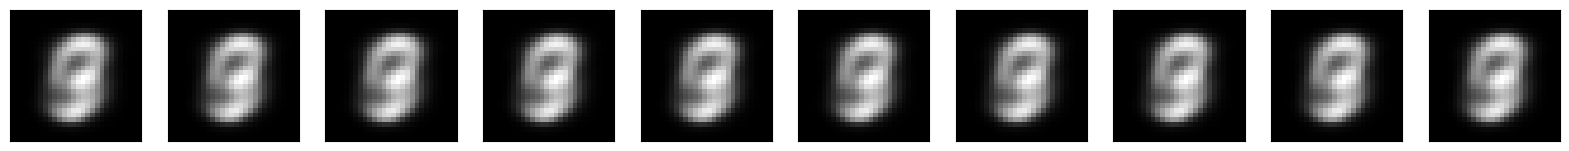

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


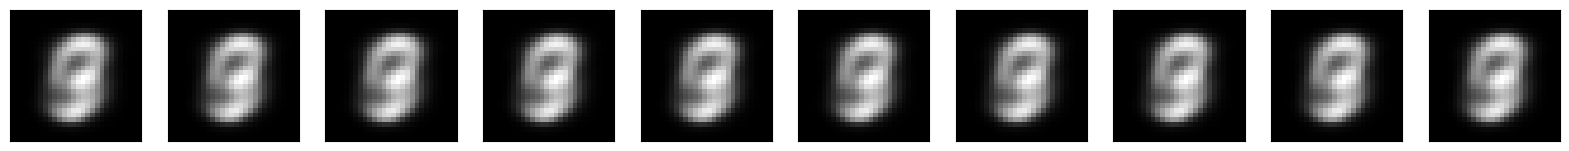

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


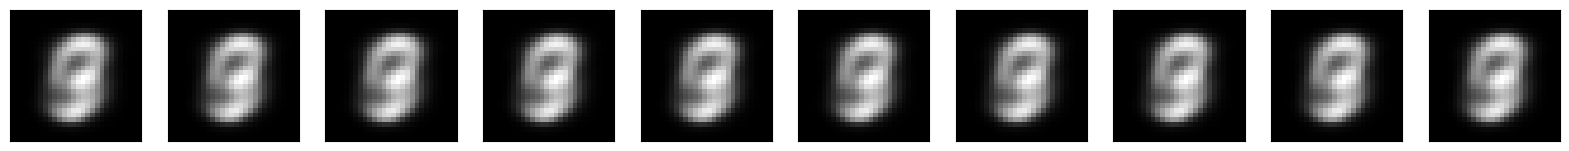

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


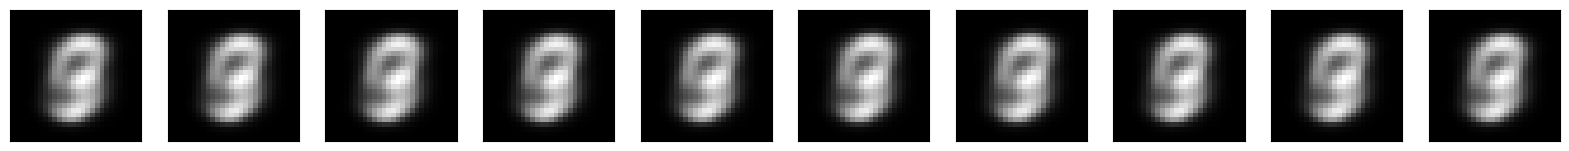

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


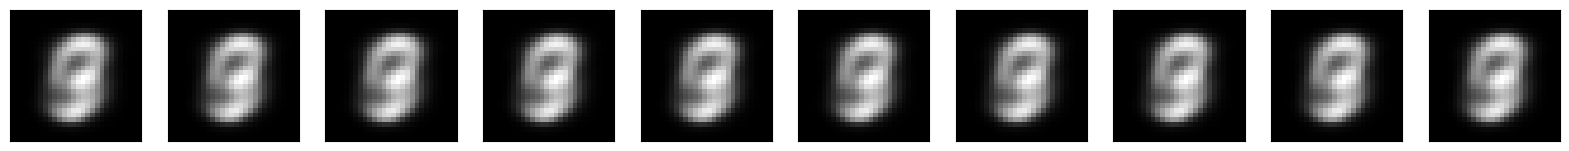

In [34]:
# Generate reconstructions along the line joining two training data samples
def InterpolateImgs(img_1, img2, steps=10):
    latentValue1 = encoder.predict(img_1.reshape(1, -1))
    latentValue2 = encoder.predict(img2.reshape(1, -1))
    latentsInterpolated = np.linspace(latentValue1, latentValue2, steps).reshape(-1, latentValue1.shape[-1])
    images_interpolated = decoder.predict(latentsInterpolated)
    return images_interpolated

# Generate and display interpolated images for sample samplePairs
samplePairs = [(x_train[0], x_train[1]), (x_train[2], x_train[3]), (x_train[4], x_train[5]), (x_train[6], x_train[7]), (x_train[8], x_train[9])]
for p in samplePairs:
    images_interpolated = InterpolateImgs(p[0], p[1])
    plt.figure(figsize=(20, 2))
    for img_number in range(len(images_interpolated)):
        ax = plt.subplot(1, len(images_interpolated), img_number + 1)
        plt.imshow(images_interpolated[img_number].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

**For hidden dim =64**

In [35]:
# Build and train autoencoder models
dim_hidden = 64

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6982 - val_loss: 0.6155
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5987 - val_loss: 0.5534
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5398 - val_loss: 0.5037
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4927 - val_loss: 0.4637
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4546 - val_loss: 0.4313
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4240 - val_loss: 0.4050
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3988 - val_loss: 0.3834
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3785 - val_loss: 0.3656
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3614 - val_loss: 0.3508
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3472 - val_loss: 0.3385
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


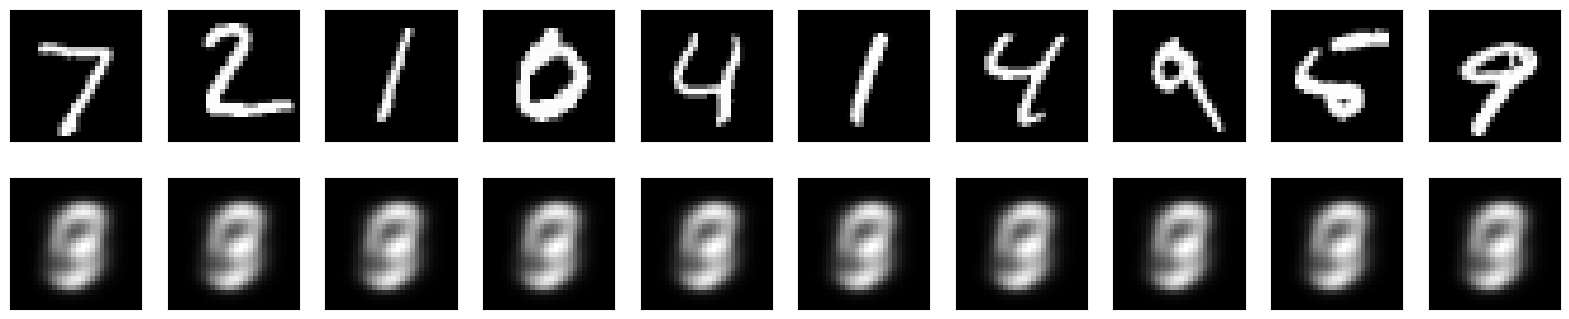

	***************
	Hidden Dimension 64:
	 Train Error = 0.07807120680809021,
	 Test Error = 0.07836434245109558


In [36]:
autoencoder_model, encoder, decoder = autoencoder_custom(dim_hidden)
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_model.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Compute reconstruction errors
train_reconstruction = autoencoder_model.predict(x_train)
test_reconstruction = autoencoder_model.predict(x_test)
trainError = mean_squared_error(x_train, train_reconstruction)
testError = mean_squared_error(x_test, test_reconstruction)
reconstruction_errors = (trainError, testError)

# Display sample reconstructions
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_reconstruction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Display reconstruction errors
print("\t***************")
print(f"\tHidden Dimension {dim_hidden}:\n\t Train Error = {trainError},\n\t Test Error = {testError}")



**(b) Perform the reconstruction on the line joining two training data samples in the hidden space.
Consider at least 5 pairs of samples.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


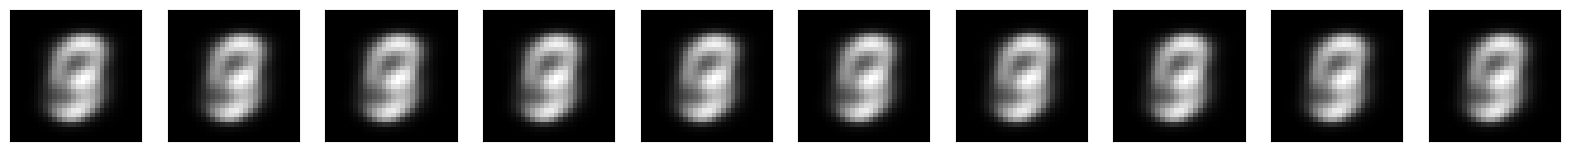

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


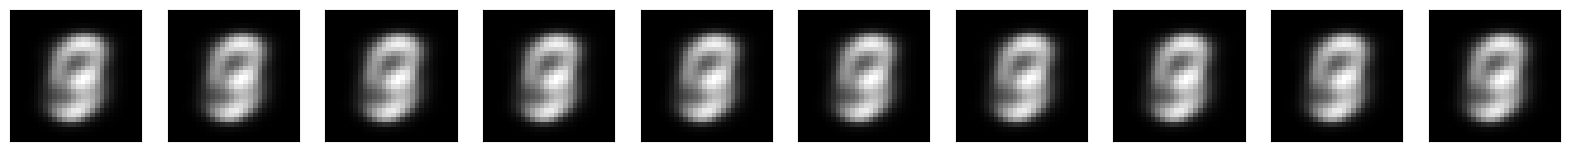

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


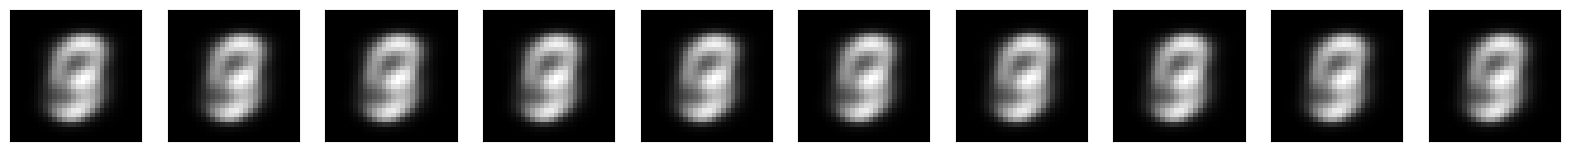

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


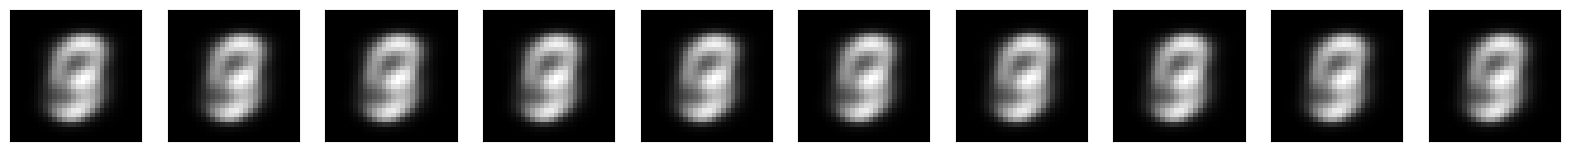

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


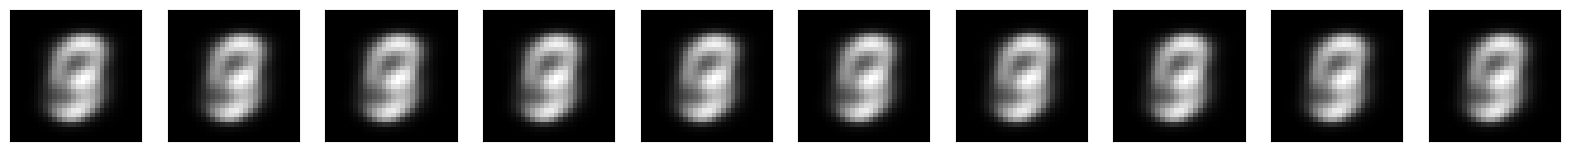

In [38]:
# Generate reconstructions along the line joining two training data samples
def InterpolateImgs(img_1, img2, steps=10):
    latentValue1 = encoder.predict(img_1.reshape(1, -1))
    latentValue2 = encoder.predict(img2.reshape(1, -1))
    latentsInterpolated = np.linspace(latentValue1, latentValue2, steps).reshape(-1, latentValue1.shape[-1])
    images_interpolated = decoder.predict(latentsInterpolated)
    return images_interpolated

# Generate and display interpolated images for sample samplePairs
samplePairs = [(x_train[0], x_train[1]), (x_train[2], x_train[3]), (x_train[4], x_train[5]), (x_train[6], x_train[7]), (x_train[8], x_train[9])]
for p in samplePairs:
    images_interpolated = InterpolateImgs(p[0], p[1])
    plt.figure(figsize=(20, 2))
    for img_number in range(len(images_interpolated)):
        ax = plt.subplot(1, len(images_interpolated), img_number + 1)
        plt.imshow(images_interpolated[img_number].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

***2. Variational Autoencoder (VAE): Train a VAE (on MNIST dataset) for the tasks of generating
MNIST-like digits. Encoder learns a distribution in 16D space. After successfully training the
VAE, generate 64 images and display.***

In [73]:
import tensorflow as tf
from tensorflow.keras import layers

# Data Preprocessing
(x_train, _), (_, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.

# Define the VAE Model
class VAE(tf.keras.Model):
  def __init__(self):
    super(VAE, self).__init__()

    # Encoder
    self.encoder = tf.keras.Sequential([
        layers.Dense(400, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
    ])

    # Latent Space
    self.mean = layers.Dense(16)
    self.log_var = layers.Dense(16)

    # Decoder
    self.decoder = tf.keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(400, activation="relu"),
        layers.Dense(28 * 28, activation="sigmoid"),
    ])

  def call(self, inputs):
    x = self.encoder(inputs)
    z_mean = self.mean(x)
    z_log_var = self.log_var(x)

    # Reparameterization Trick
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    z = z_mean + tf.exp(z_log_var / 2) * epsilon

    reconstructed = self.decoder(z)

    return reconstructed, z_mean, z_log_var

  def generate(self, batch_size):
    z = tf.random.normal(shape=(batch_size, 16))
    generated_images = self.decoder(z)
    return generated_images

# Train the VAE
vae = VAE()
vae.compile(loss=tf.keras.losses.binary_crossentropy, optimizer="adam")
vae.fit(x_train, x_train, epochs=10, batch_size=32)






Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1867
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0977
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0941
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0923
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0906
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0897
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0888
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0879
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0875


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


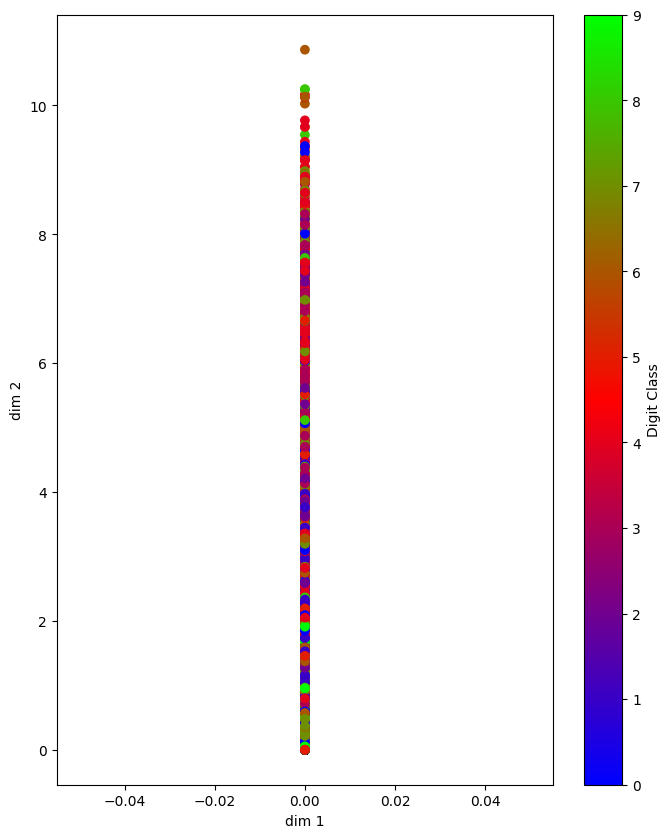

In [74]:
# Encode test data and visualize latent space
mu = vae.encoder.predict(x_test)  

plt.figure(figsize=(8, 10))
plt.scatter(mu[:, 0], mu[:, 1], c=y_test, cmap='brg')  
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.colorbar(label='Digit Class')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

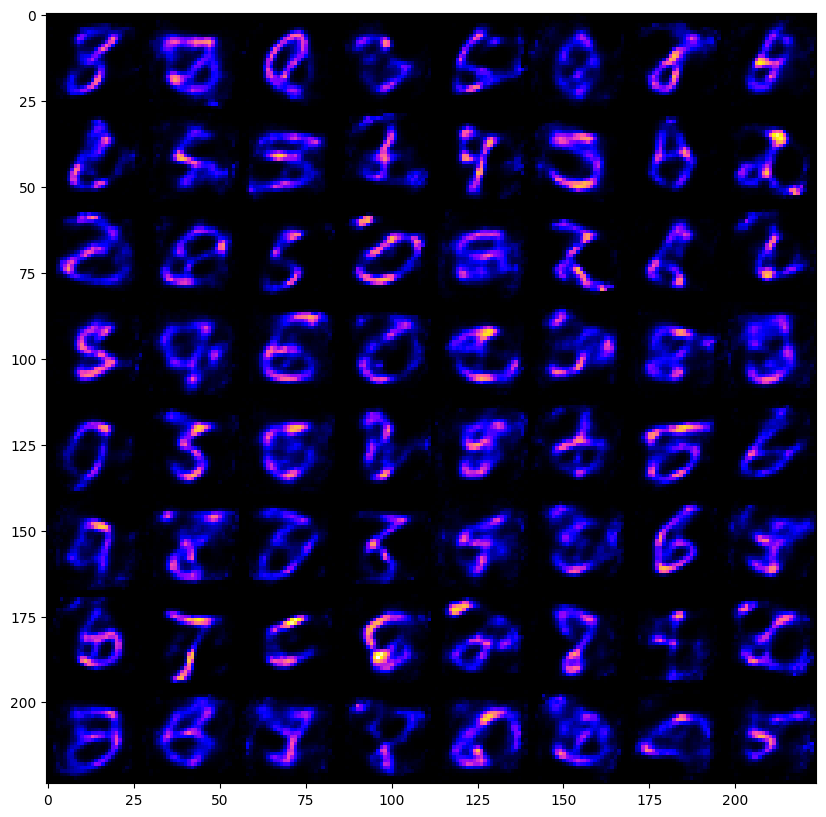

In [75]:
# Generate and display 64 images
n = 8  # Number of images per row and column (creates 64 images)
figure = np.zeros((28 * n, 28 * n))  

# Create a grid of points in latent space for sampling
grid_x = np.linspace(-10, 10, n)
grid_y = np.linspace(-10, 10, n)

for i, yi in enumerate(grid_y):
  for j, xi in enumerate(grid_x):
    z_sample = np.random.normal(loc=0.0, scale=1.0, size=(1, 16))  # Assuming latent_dim=16
    x_decoded = vae.decoder.predict(z_sample)
    digit = x_decoded[0].reshape(28, 28)  # Reshape to 28x28 for image display

    figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

plt.figure(figsize=(20, 10))
plt.imshow(figure, cmap='gnuplot2')
plt.show()

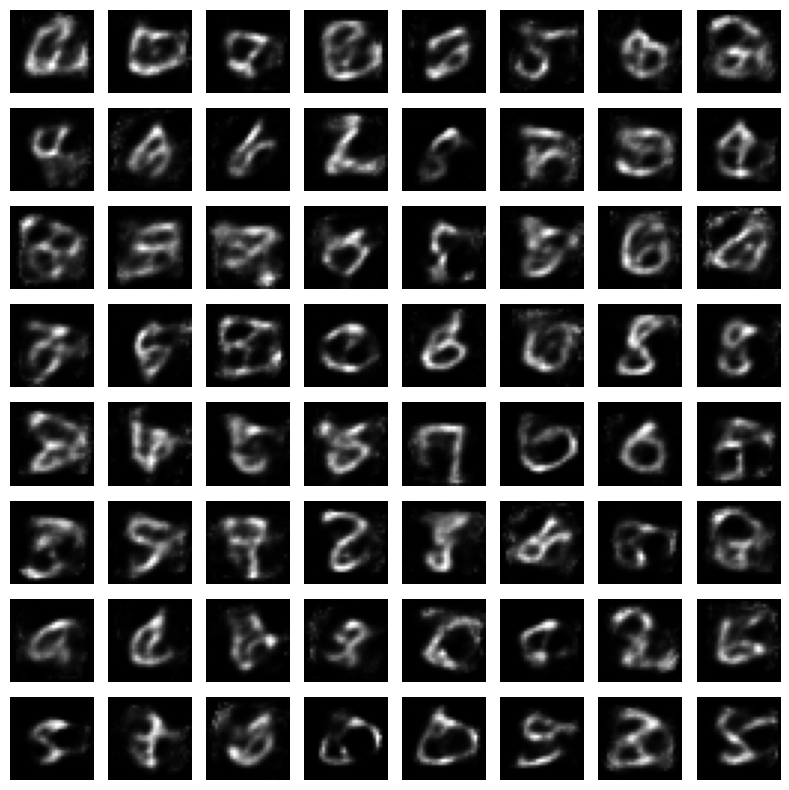

In [76]:
# Generate Images
generated_images = vae.generate(64)
tf.experimental.numpy.experimental_enable_numpy_behavior()

generated_images = generated_images.reshape(-1, 28, 28)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 8, figsize=(8, 8))
for i in range(64):
  axs[i // 8, i % 8].imshow(generated_images[i], cmap="gray")
  axs[i // 8, i % 8].axis("off")
plt.tight_layout()
plt.show()